Recent developments in neuroscience have led to a resurgence in interest in partY. Despite this interest, how partY relates to non-verbal intelligence and body weight remains poorly understood. The aim of this study is to investigate factors associated with increased partY in a sample of 40 patients. 

First let's load the necessary packages:

In [44]:
from statsmodels.formula.api import ols

import seaborn as sns
import pandas as pd
import numpy as np

Then we can set the random seed to improve reproducibility:

In [21]:
np.random.seed(42)

Next, we load the raw data, which is contained in a CSV. Missing data is coded with a period, so we make sure that Pandas replaces these with NaN values.

In [22]:
url = 'https://raw.githubusercontent.com/danibene/Benesch-D-QLSC612/master/data/brainsize.csv'
df = pd.read_csv(url, sep=';', na_values='.', index_col=0)

print(df.head(5))
print('The number of participants is ' + str(len(df.index)))

   Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
1  Female   133  132  124   118.0    64.5     816932
2    Male   140  150  124     NaN    72.5    1001121
3    Male   139  123  150   143.0    73.3    1038437
4    Male   133  129  128   172.0    68.8     965353
5  Female   137  132  134   147.0    65.0     951545
The number of participants is 40


Gender, several measures of intelligence, weight, height, and MRI count were measured for the larger project that this study is a part of. However, the scope of this study is limited to PIQ and weight. Now we load partY:

In [23]:
partY = np.random.normal(loc=0.0, scale=1.0, size=len(df.index))
df.insert(len(df.columns), 'partY', partY)
print(df.head(5))

   Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count     partY
1  Female   133  132  124   118.0    64.5     816932  0.496714
2    Male   140  150  124     NaN    72.5    1001121 -0.138264
3    Male   139  123  150   143.0    73.3    1038437  0.647689
4    Male   133  129  128   172.0    68.8     965353  1.523030
5  Female   137  132  134   147.0    65.0     951545 -0.234153


Then run ordinary least squares regression as save the output as a txt file:

In [48]:
model = ols('partY ~ PIQ + Weight', data=df).fit()
with open('summary_partY.txt', 'w') as fh:
    fh.write(model.summary().as_text())
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  partY   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     4.134
Date:                Sun, 31 May 2020   Prob (F-statistic):             0.0244
Time:                        23:15:30   Log-Likelihood:                -46.908
No. Observations:                  38   AIC:                             99.82
Df Residuals:                      35   BIC:                             104.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5064      1.161     -3.019      0.005      -5.864      -1.149
PIQ            0.0138      0.006      2.186      0.036       0.001       0.027
Weight         0.0113      0.006      1.863      0.071      -0.001       0.024
==============================================================================
Omnibus:                        0.663   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.903
Kurtosis:                       3.136   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Performance IQ was a signficant predictor (p = 0.036) of partY, while body weight was on the borderline of signficance (p = 0.071). Future research should investigate body weight in a larger sample.

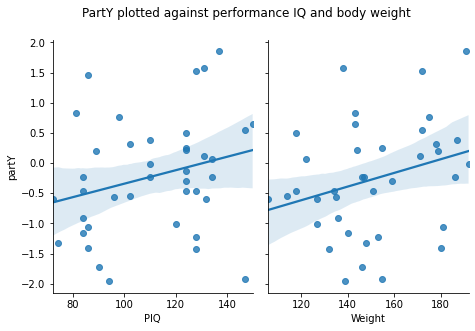

In [54]:
fig = sns.pairplot(df, x_vars=["PIQ", "Weight"], y_vars=["partY"],
             height=4, aspect=.8, kind="reg");
fig.fig.suptitle('PartY plotted against performance IQ and body weight', y=1.1)
fig.savefig('pairplot_partY.png')

In the plots, it can be seen than when PIQ and weight increase, partY also tends to increase.

Lastly, we will try to replicate these findings with a new measure of partY, called partY2. This will be measured with a different random seed.

In [33]:
np.random.seed(1)

We will add this to the existing dataframe and save it as a CSV.

In [34]:
partY2 = np.random.normal(loc=0.0, scale=1.0, size=len(df.index))
df.insert(len(df.columns), 'partY2', partY2)
print(df.head(5))
df.to_csv('data_used_in_analysis.csv')

   Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count     partY    partY2
1  Female   133  132  124   118.0    64.5     816932  0.496714  1.624345
2    Male   140  150  124     NaN    72.5    1001121 -0.138264 -0.611756
3    Male   139  123  150   143.0    73.3    1038437  0.647689 -0.528172
4    Male   133  129  128   172.0    68.8     965353  1.523030 -1.072969
5  Female   137  132  134   147.0    65.0     951545 -0.234153  0.865408


Then we will again investigate its relationship with PIQ and weight using ordinary least squares regression.

In [49]:
model = ols('partY2 ~ PIQ + Weight', data=df).fit()
with open('summary_partY2.txt', 'w') as fh:
    fh.write(model.summary().as_text())
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 partY2   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1.843
Date:                Sun, 31 May 2020   Prob (F-statistic):              0.173
Time:                        23:16:03   Log-Likelihood:                -50.917
No. Observations:                  38   AIC:                             107.8
Df Residuals:                      35   BIC:                             112.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3327      1.291      1.807      0.079      -0.287       4.953
PIQ           -0.0052      0.007     -0.748      0.460      -0.019       0.009
Weight        -0.0119      0.007     -1.766      0.086      -0.026       0.002
==============================================================================
Omnibus:                        0.356   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.320
Skew:                          -0.202   Prob(JB):                        0.852
Kurtosis:                       2.802   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Surprisingly, performance IQ did not significantly predict partY, while body weight was again at the border of significance (p = 0.086).